# **TRAVEL INSURANCE**

Created By: Ananda Rahmah Fauziyah

## **BUSINESS PROBLEM UNDERSTANDING**

**Context:**

Asuransi perjalanan adalah jenis asuransi yang memberikan perlindungan selama kita bepergian baik di dalam negeri maupun ke luar negeri. Beberapa negara bahkan telah mewajibkan traveler atau para pendatang untuk memiliki asuransi perjalanan, contohnya negara-negara di Eropa dan Amerika. Besarnya premi tergantung pada cakupan yang diinginkan, durasi perjalanan, dan tujuan perjalanan. Perusahaan yang bergerak di bidang asuransi perjalanan ingin mengetahui pemegang polis yang akan mengajukan klaim asuransi untuk pertanggungan. Data pemegang polis di perusahaan asuransi merupakan data historis yang terdiri dari tujuan, produk asuransi, dan sebagainya. 

**PROBLEM STATEMENT:**

Tanpa sistem otomatis untuk memprediksi kemungkinan klaim asuransi dari pelanggan, perusahaan asuransi mengalami kesulitan dalam merencanakan dan mengelola risiko klaim dengan efektif. Kesulitan ini dapat berujung pada penetapan premi yang kurang kompetitif, peningkatan jumlah klaim palsu, serta penurunan kepuasan pelanggan. Dampak ini tidak hanya mengancam profitabilitas perusahaan, tetapi juga kestabilan operasionalnya dalam jangka panjang.

**GOALS:**

Berdasarkan masalah tersebut, perusahaan ingin membangun model machine learning yang mampu memprediksi dengan akurasi tinggi apakah seorang pelanggan akan mengajukan klaim asuransi berdasarkan data historis yang tersedia.

Selain itu, memungkinan perusahaan mengoptimalkan pengelolaan risiko klaim berdasarkan prediksi model. Serta peningkatan penanganan klaim dengan memprioritaskan pelanggan yang diprediksi memiliki kemungkinan tinggi untuk mengajukan klaim.

**ANALYTIC APPROACH:**

Jadi yang akan dilakukan adalah menganalisis data historis untuk mengidentifikasi pola yang membedakan antara klaim yang diajukan dan yang tidak diajukan. Dengen memahami karakteristik dan fitur-fitur yang terkait dengan klaim yang sudah ada, kita dapat mengidentifikasi faktor-faktor yang mempengaruhi kemungkinan seseorang mengajukan klaim. 

Kemudian, kita akan membangun model klasifikasi yang akan membantu perusahaan untuk memprediksi probabilitas bahwa klaim asuransi akan diajukan berdasarkan data yang tersedia.

**METRIC EVALUATION**

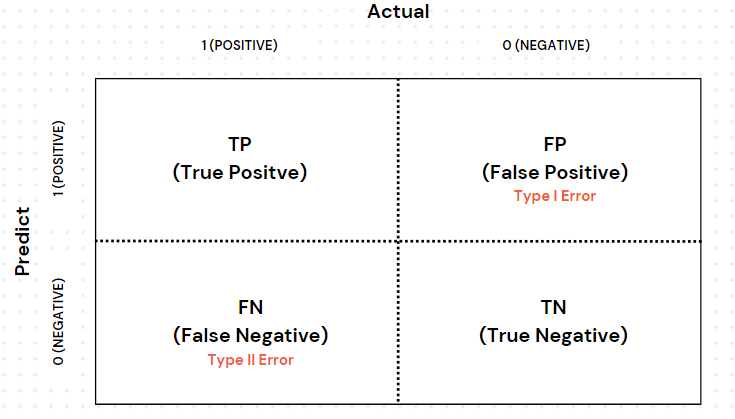

Perusahaan asuransi perjalanan, kemampuan untuk memprediksi klaim secara akurat sangat penting untuk mengurangi biaya operasional dan meningkatkan kepuasan pelanggan. Dua jenis kesalahan utama yang perlu diperhatikan adalah:
- **False Positive (Type I Error)**: 
Ketika model memprediksi bahwa klaim akan diajukan, padahal tidak. 
Akibatnya: alokasi sumber daya yang tidak perlu, sehingga meningkatkan biaya operasional.
- **False Negative (Type II Error)**:
Ketika model tidak memprediksi klaim yang sebenarnya akan diajukan. 
Akibatnya: berpotensi membuat perusahaan tidak siap menghadapi klaim, mengakibatkan kehilangan kesempatan untuk mengelola klaim secara efektif.

Untuk menyeimbangkan kebutuhan ini, **F1 Score** akan digunakan sebagai metrik utama. F1 Score adalah harmonisasi antara precision dan recall, yang memungkinkan kita untuk menilai kinerja model dalam situasi di mana kedua jenis kesalahan (False Positives dan False Negatives) memiliki dampak yang signifikan.
 - Precision: Metrik ini menunjukkan **seberapa sering** prediksi klaim yang diajukan benar. Precision yang tinggi akan membantu meminimalkan biaya operasional dengan mengurangi False Positives.
 - Recall: Metrik ini menunjukkan **seberapa baik** model dalam mendeteksi klaim yang benar-benar terjadi. Recall yang tinggi akan mengurangi risiko kehilangan klaim penting (mengurangi False Negatives).

F1 Score ini bertujuan untuk memberikan prediksi klaim yang lebih akurat melalui model yang dibangun, yang akan membantu perusahaan dalam mengelola risiko secara efektif, mengurangi biaya operasional yang tidak perlu dan meningkatkan kepuasan pelanggan melalui pengelolaan klaim yang lebih baik.

## **LIBRARY**

In [130]:
#Library
## Dasar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy import stats
from scipy.stats import chi2_contingency, mannwhitneyu

## Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler, FunctionTransformer 
from category_encoders import BinaryEncoder
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, StratifiedKFold, GridSearchCV

## Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN, BorderlineSMOTE, KMeansSMOTE, SVMSMOTE 
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

## Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier 
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import classification_report, make_scorer, confusion_matrix

warnings.filterwarnings('ignore')

## **DATA UNDERSTANDING & EXPLORATION**
**Data**

Attribution Information:

| Attribute | Description |
| --- | --- | 
| Agency | Name of agency |
| Agency Type | Type of travel insurance agencies |
| Distribution Channel | Channel of travel insurance agencies |
| Product Name | Name of the travel insurance products |
| Gender | Gender of insured |
| Duration | Duration of travel |
| Destination | Destination of travel |
| Net Sales | Amount of sales of travel insurance policies |
| Commission (in value) | Commission received for travel insurance agency |
| Age | Age of insured |
| Claim | Claim Status |

In [2]:
# Read Data
data = pd.read_csv("data_travel_insurance.csv")
data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


In [3]:
# Info Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


Berdasarkan output tersebut, didapatkan beberapa informasi yaitu:
- Data terdiri dari 44328 baris dan 11 kolom.
- Tipe data (dtypes) pada data tersebut yaitu object, integer, dan float
- Kolom-kolom dengan tipe data object termasuk ke dalam fitur kategorikal antara lain Agency, Agency Type, Distribution Channel, Product Name, Gender, Destination, Claim.
- Kolom-kolom dengan tipe data integer dan float termasuk ke dalam fitur numerikal anatra lain Duration, Net Sales, Commision (in value), Age

### **Descriptive Statistics** :
untuk memahami distribusi dan karakteristik data


In [4]:
# Statistik Deskriptif
data.describe()

,Duration,Net Sales,Commision (in value),Age
count,44328.000000,44328.000000,44328.000000,44328.000000
mean,49.424292,40.550948,9.707692,39.925600
std,109.153961,48.661970,19.625637,13.954926
min,-1.000000,-357.500000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.500000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


Didapatkan beberapa informasi sebagai berikut.
- Terdapat beberapa nilai yang tidak masuk akal seperti nilai negatif pada kolom Duration dan Net Sales, serta umur 0.
- Nilai yang sangat tinggi dalam kolom Duration, Net Sales, dan Commision yang mungkin termasuk ke dalam outliers.
- Distribusi Data:
    - `Duration` dan `Net Sales`: Perbedaan besar antara mean dan median (50%) menunjukkan kemungkinan adanya skewness dalam distribusi data, terutama karena adanya outliers.
    - `Commission (in value)`: Mayoritas data komisi bernilai 0 (lihat dari median dan 25%-75%), yang menunjukkan bahwa sebagian besar transaksi mungkin tidak menghasilkan komisi, sementara ada beberapa transaksi dengan komisi yang sangat tinggi, mengindikasikan distribusi yang sangat skewed.
    - `Age`: Data usia cukup terpusat di sekitar 35-43 tahun (lihat dari 25%-75%), tetapi outliers seperti usia 0 dan 118 menunjukkan adanya kesalahan data atau kasus-kasus yang tidak biasa.

### **Data Visualization**
**Distribusi Fitur Numerik**

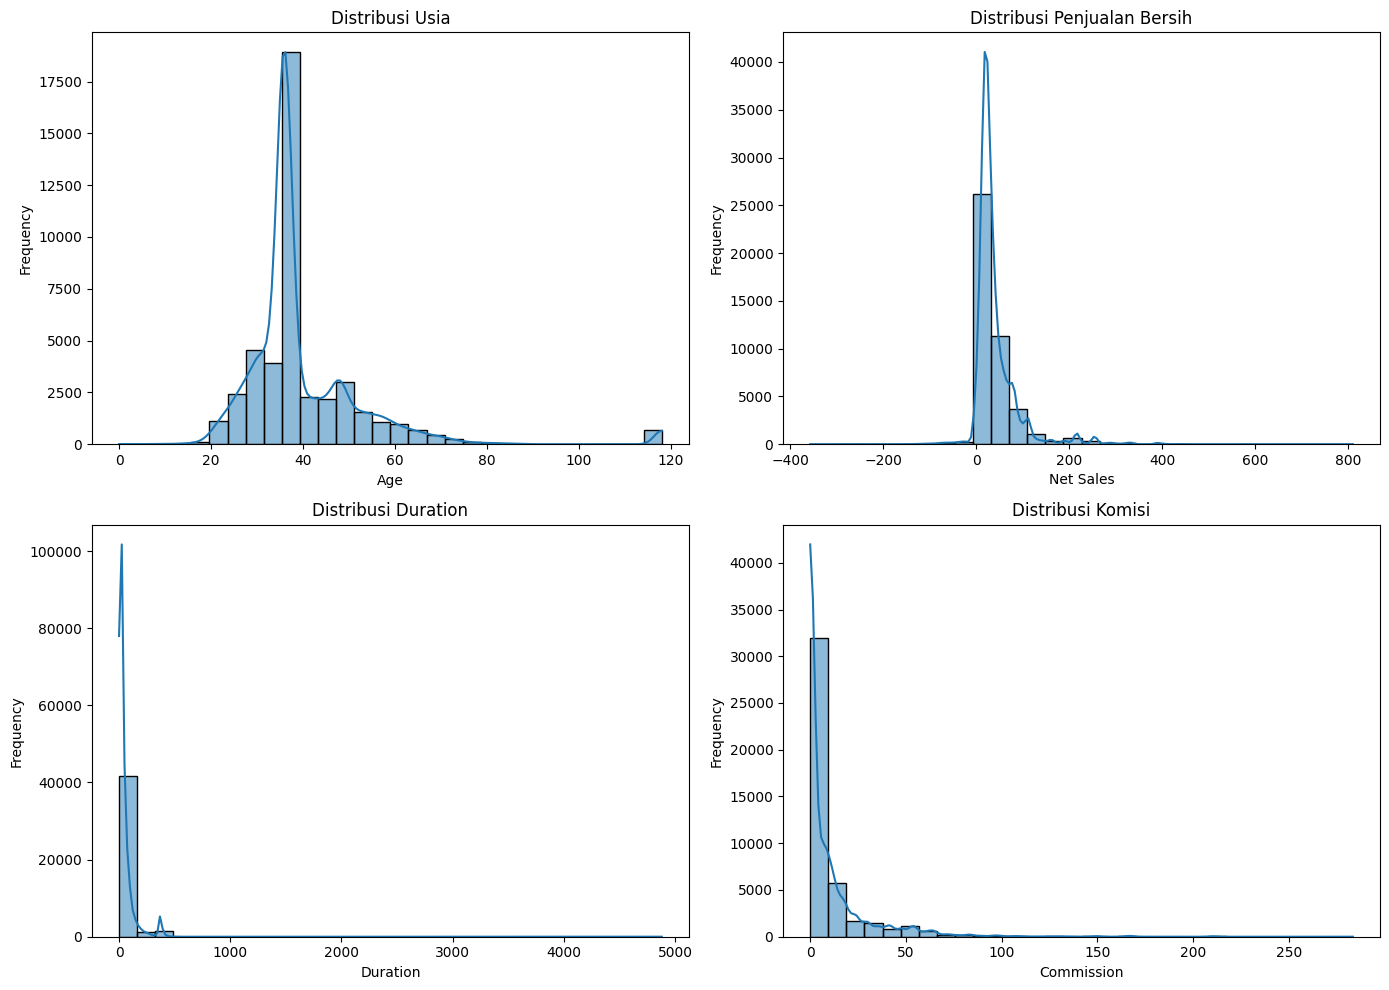

In [5]:
# Membuat subplots dengan 2 baris dan 2 kolom
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram untuk fitur 'Age'
sns.histplot(data['Age'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribusi Usia')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# Histogram untuk fitur 'Net_Sales'
sns.histplot(data['Net Sales'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribusi Penjualan Bersih')
axes[0, 1].set_xlabel('Net Sales')
axes[0, 1].set_ylabel('Frequency')

# Histogram untuk fitur 'Duration'
sns.histplot(data['Duration'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribusi Duration')
axes[1, 0].set_xlabel('Duration')
axes[1, 0].set_ylabel('Frequency')

# Histogram untuk fitur 'Commission'
sns.histplot(data['Commision (in value)'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribusi Komisi')
axes[1, 1].set_xlabel('Commission')
axes[1, 1].set_ylabel('Frequency')

# Menyesuaikan layout agar tidak tumpang tindih
plt.tight_layout()

# Menampilkan gambar
plt.show()

Informasi yang didapatkan dari distribusi untuk setiap fitur yaitu:
`Age (Usia)`
- Mayoritas data usia ada di sekitar umur 30 hingga 40 tahun.
- Terdapat extreme outliers di ujung kanan (usia >100 tahun)
- Persebaran data, sedikit skewed ke kanan berarti lebih banyak individu yang lebih tua

`Net Sales (Penjualan Bersih)`
- Persebaran data, sangat skewed ke kanan dengan sebabgian besar terfokus di dekat angka nol.
- Terdapat outlier yang signifikan dibeberapa nilai di bagian kiri histogram (nilai negatif) dan di ujung kanan (nilai yang sangat tinggi)
- Persebaran data ini dapat menunjukkan bahwa sebagian besar polis asuransi memiliki penjualan bersih yang rendah dengan beberapa polis memiliki penjualan yang sangat tinggi

`Duration (Durasi Perjalanan)`
- Persebaran data,angat skewed ke kanan dengan sebagian besar data berada di kisaran yang sangat rendah (dekat dengan nol). 
- Durasi yang sangat tinggi (>1000 hari) tampak tidak realistis dan bisa merupakan outlier
- Sebagian besar perjalanan hanya berlangsung beberapa hari dengan hanya beberapa perjalanan yang berlangsung sangat lama. 

`Commision (komisi)`
- Persebaran data, sangat skewed ke kanan dengan mayoritas nilai komisi berada di dekat angka nol. Berarti sebagian besar transaksi mungkin menghasilkan komisi sangat rendah bahkan nol.
- Terdapat outlier di nilai komisi yang sangat tinggi yang mungkin berhubungan dengan transaksi besar atau polis yang terlalu tinggi.
- Mayoritas agen asuransi mendapatkan komisi yang kecil atau tidak mendapatkan komisi sama sekali dari sebagian besar transaksi.

**Imbalance Data**

untuk mengecek apakah ada ketidakseimbangan antara kelas

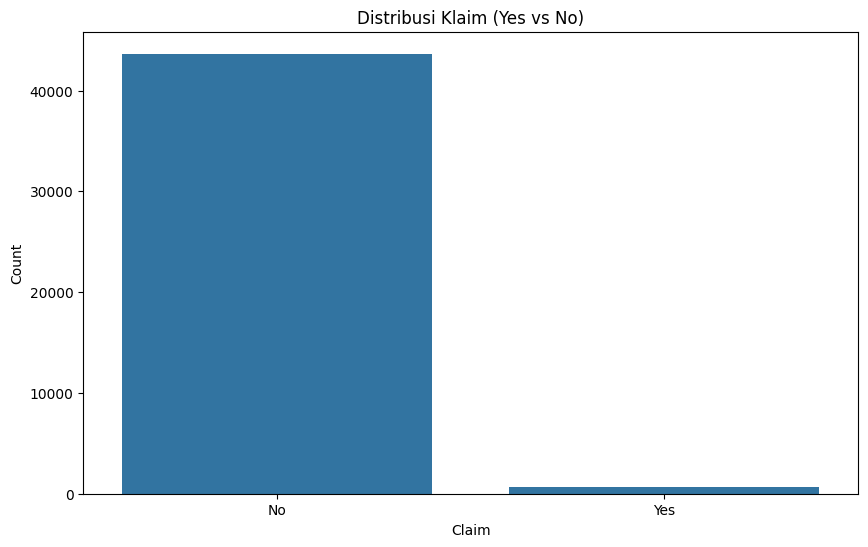

In [6]:
# Histogram
plt.figure(figsize=(10, 6))
sns.countplot(x=data['Claim'])
plt.title('Distribusi Klaim (Yes vs No)')
plt.xlabel('Claim')
plt.ylabel('Count')
plt.show()

In [7]:
data['Claim'].value_counts()

Claim
No     43651
Yes      677
Name: count, dtype: int64

Dari histogram di atas, dapat dilihat bahwa kelas 'No' jauh lebih banyak dibanding dengan kelas 'Yes', berarti data ini terdapat ketidakseimbangan kelas (imbalance data). Hal ini dapat membuat model machine learning saat dilatih akan menjadi bias terhadap kelas mayoritas 'No' dan dapat mengakibatkan performa yang buruk dalam mendeteksi kelas minoritas 'Yes'

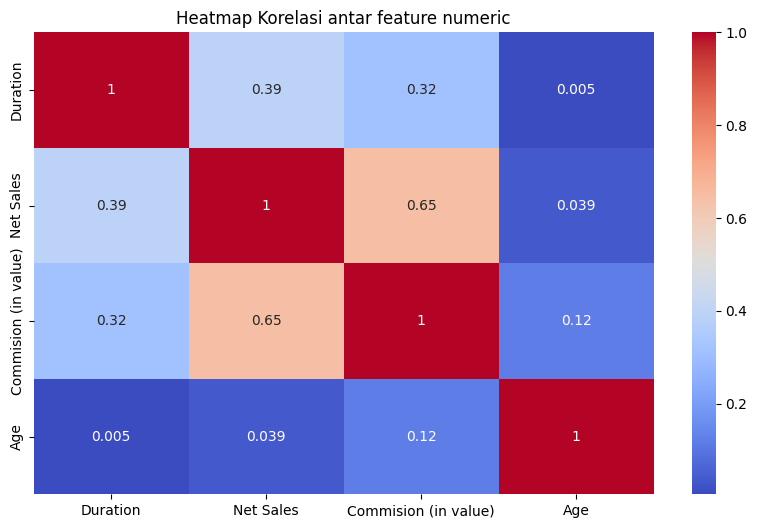

In [8]:
kategoriNumerik = data.select_dtypes(include=['float64', 'int64'])

# Korelasi antar fitur numerik
plt.figure(figsize=(10, 6))
sns.heatmap(kategoriNumerik.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi antar feature numeric')
plt.show()

Korelasi:
- Nilai korelasi yang mendekati 1 atau -1 menunjukkan hubungan yang kuat,  
- nilai yang mendekati 0 menunjukkan hubungan yang lemah atau tidak ada.

Dari heatmap korelasi antar fitur numerik didapatkan informasi:
- `Net Sales` dan `Commision` memiliki korelasi yang kuat (mendekati 1)
- `Duration` menunjukkan korelasi moderat dengan `Net Sales` dan `Commision` 
- Korelasi `Age` dengan fitur lain sangat lemah

### **Identification of Missing Values and Outlier**
**Missing Value**

In [9]:
# Extract General Information (Tipe Data, Missing Value, %Missing Value, Unique, Sample Unique)

listItem = [] # data yang akan ditampung 
for i in data.columns:
    listItem.append([
        i, 
        data[i].dtype,                                  #tipe data
        data[i].isna().sum(),                           # missing value
        round(data[i].isna().sum()/len(data)*100,2),    # %Missing Value
        data[i].nunique(),                              # unique
        data[i].unique()[:3]                            # sample unique
    ])

infoDF = pd.DataFrame(listItem, columns= 'Nama Kolom, Tipe Data, Missing Value, %Missing Value, Unique, Sample Unique'.split(', '))
infoDF

,Nama Kolom,Tipe Data,Missing Value,%Missing Value,Unique,Sample Unique
0,Agency,object,0,0.00,16,"[C2B, EPX, JZI]"
1,Agency Type,object,0,0.00,2,"[Airlines, Travel Agency]"
2,Distribution Channel,object,0,0.00,2,"[Online, Offline]"
3,Product Name,object,0,0.00,26,"[Annual Silver Plan, Cancellation Plan, Basic ..."
4,Gender,object,31647,71.39,2,"[F, nan, M]"
5,Duration,int64,0,0.00,437,"[365, 4, 19]"
6,Destination,object,0,0.00,138,"[SINGAPORE, MALAYSIA, INDIA]"
7,Net Sales,float64,0,0.00,1006,"[216.0, 10.0, 22.0]"
8,Commision (in value),float64,0,0.00,915,"[54.0, 0.0, 7.7]"
9,Age,int64,0,0.00,89,"[57, 33, 26]"


Berdasarkan output tersebut, didapatkan beberapa informasi yaitu:
- Terdapat kolom yang terdapat missing value yaitu kolom `Gender` sebesar 31647 atau sebesar 71.39%
- Tipe data pada tiap kolom sudah sesuai

**Outlier**

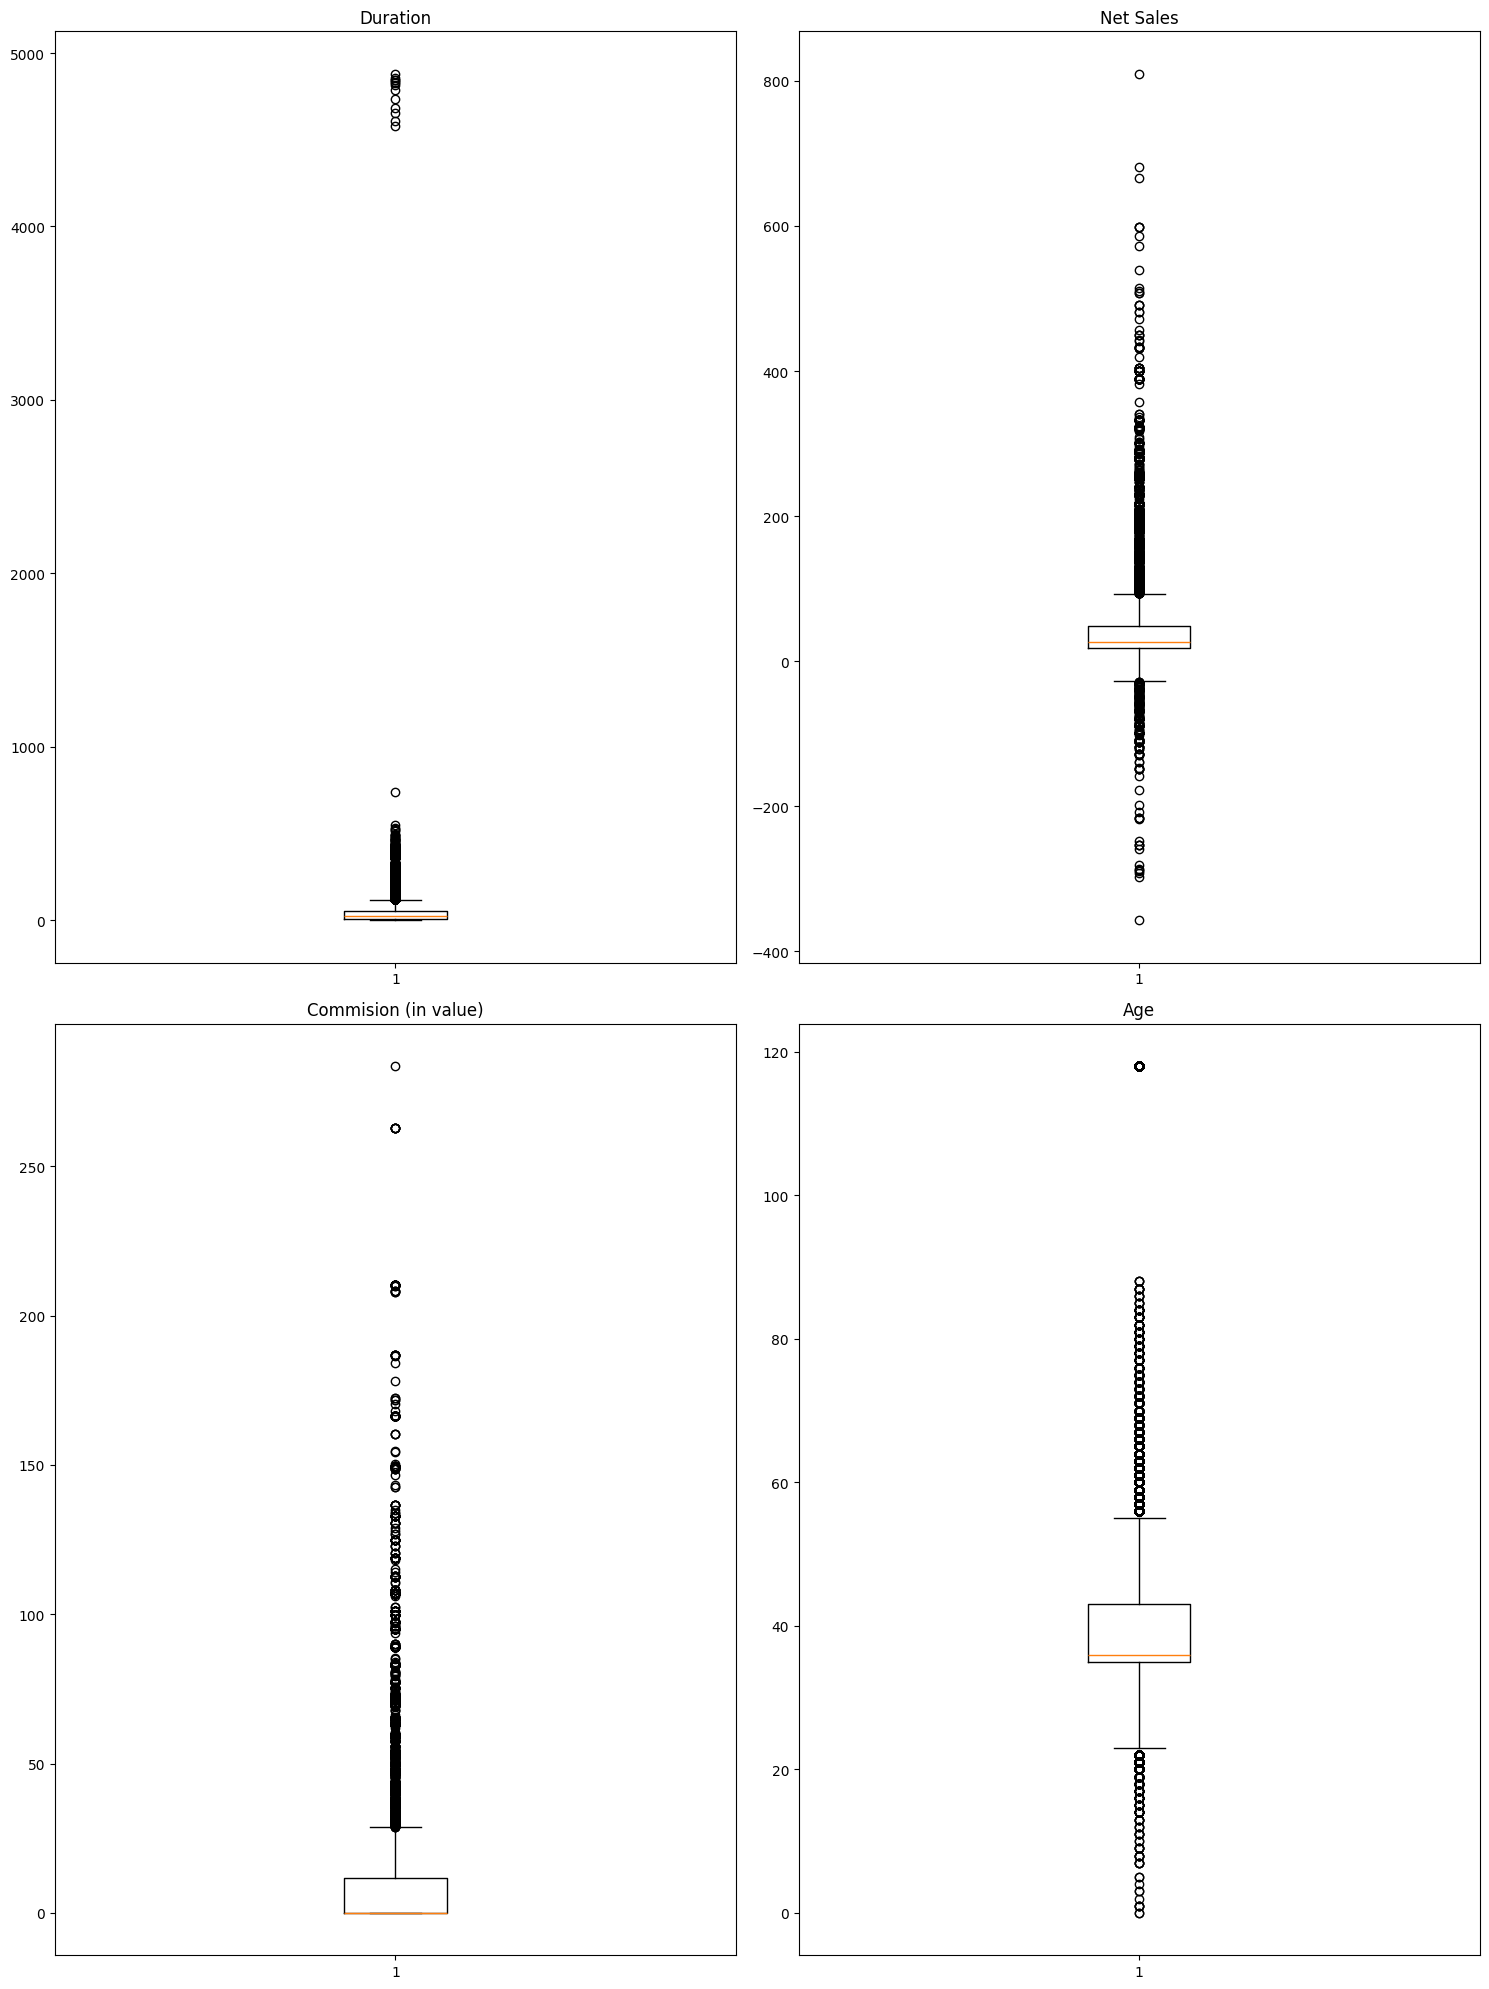

In [10]:
# Cek Outlier : Metode Boxplot (semua variabel numerik)
number_col = data.select_dtypes(include=['float64','int64']).columns

num_col = len(number_col) # berapa jumlah kolom yang termasuk kolom numerikal
num_row = (num_col // 3) + (num_col % 3 > 0) # menentukan berapa banyak row nya  
num_row

plt.figure(figsize=(15,20))

for i, column in enumerate(number_col,1):
    plt.subplot(num_row,2,i)
    plt.boxplot(data[column].dropna())
    plt.title(column)

plt.tight_layout()
plt.show()

In [11]:
# cek berapa persen outlier setiap kolom
def calculate_outliers_percentage(data):
    outlier_percentages = {}
    for column in ['Duration', 'Net Sales', 'Commision (in value)', 'Age']:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outlier_percentage = (len(outliers) / len(data)) * 100
        outlier_percentages[column] = outlier_percentage
        
        print(f"Persentase outlier untuk {column}: {outlier_percentage:.2f}%")
    
    return outlier_percentages

# Menghitung persentase outlier
outlier_percentages = calculate_outliers_percentage(data)

Persentase outlier untuk Duration: 8.73%
Persentase outlier untuk Net Sales: 8.75%
Persentase outlier untuk Commision (in value): 11.07%
Persentase outlier untuk Age: 11.72%


**Duplicate Data**

Cek Data Duplikat pada dataset raw

In [12]:
# Cek Duplikasi Data pada Data Raw
rawDataDuplicated = data.duplicated().sum()
percentageRawDataDuplicated = round(data.duplicated().sum()/len(data)*100,2)

print(f'Jumlah Data Duplikat pada Data Raw adalah {rawDataDuplicated} dan persentasenya adalah {percentageRawDataDuplicated}%')

Jumlah Data Duplikat pada Data Raw adalah 4667 dan persentasenya adalah 10.53%


In [13]:
duplikat = data[data.duplicated()]
print("Data Raw yang duplikat:")
duplikat

Data Raw yang duplikat:


,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
331,EPX,Travel Agency,Online,Cancellation Plan,NaN,2,SINGAPORE,10.0,0.00,36,No
360,EPX,Travel Agency,Online,Cancellation Plan,NaN,6,MALAYSIA,10.0,0.00,36,No
473,EPX,Travel Agency,Online,Cancellation Plan,NaN,11,MALAYSIA,10.0,0.00,36,No
488,EPX,Travel Agency,Online,Cancellation Plan,NaN,2,SINGAPORE,10.0,0.00,36,No
636,EPX,Travel Agency,Online,1 way Comprehensive Plan,NaN,3,MALAYSIA,20.0,0.00,36,No
...,...,...,...,...,...,...,...,...,...,...,...
44309,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,49,VIET NAM,20.0,0.00,36,No
44311,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,5,THAILAND,29.7,17.82,38,No
44313,EPX,Travel Agency,Online,Cancellation Plan,NaN,5,CHINA,14.0,0.00,36,No
44315,EPX,Travel Agency,Online,1 way Comprehensive Plan,NaN,5,THAILAND,20.0,0.00,36,No


### **Deklarasi Target dan Identifikasi Feature**
**Deklarasi Target**

In [14]:
# check detail kolom Claim
data['Claim'].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
# Konversi kolom 'Claim' dari 'Yes'/'No' menjadi 1/0
data['Claim'] = data['Claim'].map({'Yes': 1, 'No': 0})

In [16]:
# check lagi
data['Claim'].unique()

array([0, 1], dtype=int64)

Setelah dilakukan konversi terhadap kolom `Claim`, maka unique valuenya menjadi 0 dan 1. 

Untuk lebih jelasnya berikut merupakan klasifikasi kolom-kolom ke dalam numerikal, kategorikal, dan target. Berikut tabelnya.
| Kategorikal | Numerikal | Target |
| --- | --- | --- |
| Agency | Duration | Claim | 
| Agency Type | Net Sales |  |
| Distribution Channel | Commisions (in value) |  |
| Product Name | Age |  |
| Destination |  |  |
| Gender |  |  |

**Identifikasi Feature**

In [17]:
# Mengelompokkan fitur ke dalam numerik dan kategorikal
numerical_features = data.select_dtypes(include=['float64', 'int64'])
categorical_features = data.select_dtypes(include=['object'])

In [18]:
numerical_features

,Duration,Net Sales,Commision (in value),Age,Claim
0,365,216.0,54.00,57,0
1,4,10.0,0.00,33,0
2,19,22.0,7.70,26,0
3,20,112.0,0.00,59,0
4,8,16.0,4.00,28,0
...,...,...,...,...,...
44323,14,30.0,0.00,36,1
44324,17,79.2,47.52,47,0
44325,64,30.0,10.50,50,0
44326,51,36.0,0.00,36,0


In [19]:
categorical_features

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Destination
0,C2B,Airlines,Online,Annual Silver Plan,F,SINGAPORE
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,MALAYSIA
2,JZI,Airlines,Online,Basic Plan,M,INDIA
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,UNITED STATES
4,C2B,Airlines,Online,Bronze Plan,M,SINGAPORE
...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,CHINA
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,AUSTRALIA
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,THAILAND
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,CHINA


**Evaluasi Relevansi Fitur**

untuk melihat apakah setiap fitur berhubungan dengan target.

FEATURE NUMERICAL : menggunakan heatmap untuk melihat korelasi antar fitur numerik dengan target (Claim)

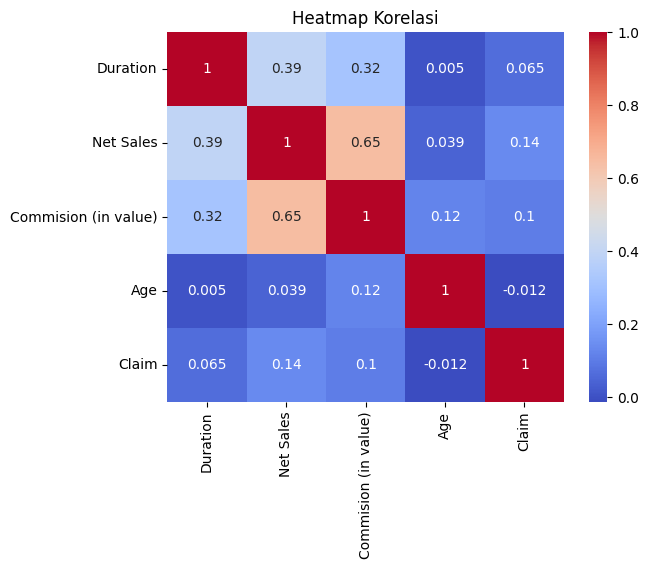

In [20]:
# Hitung korelasi
correlation = numerical_features.corr()

# Buat heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

Heatmap diatas berisi informasi yaitu:
1. Korelasi tertinggi:
- Net Sales dan Commission (in value): 0.71
- Duration dan Net Sales: 0.62
- Duration dan Commission (in value): 0.46
2. Korelasi rendah:
- Age dengan variabel lainnya (semua di bawah 0.1)
- Claim dengan variabel lainnya (semua di bawah 0.13)
3. Tidak ada korelasi negatif yang signifikan antar variabel.
4. Duration, Net Sales, dan Commission (in value) memiliki korelasi yang cukup kuat satu sama lain.

Selain menggunakan heatmap untuk mengetahui korelasi antara kolom numerik dan target, dapat dihitung juga menggunakan correlation.

In [21]:
# Menghitung korelasi antara kolom numerik dan target
correlation = data[['Duration', 'Net Sales', 'Commision (in value)', 'Age', 'Claim']].corr()

# Menampilkan korelasi dengan target 'Claim' dalam bentuk tabel
correlation_with_target = correlation[['Claim']].reset_index()
correlation_with_target.columns = ['Feature', 'Correlation with Claim']

print(correlation_with_target)

                Feature  Correlation with Claim
0              Duration                0.065427
1             Net Sales                0.135676
2  Commision (in value)                0.102868
3                   Age               -0.012175
4                 Claim                1.000000


Berdasarkan hasil korelasi antara kolom numerik dan target informasi yang didapatkan:
1. `Duration`, berarti ada korelasi positif yang sangat rendah antara durasi perjalanan dan klaim. Ini menunjukkan bahwa durasi perjalanan hanya sedikit mempengaruhi kemungkinan klaim, atau tidak ada hubungan signifikan antara keduanya.
2. `Net Sales`, berarti ada korelasi positif yang lemah antara penjualan bersih dan klaim. Ini menunjukkan bahwa semakin tinggi penjualan bersih, semakin besar kemungkinan klaim, tetapi hubungan ini tidak terlalu kuat.
3. `Commision` (in value), berarti ada korelasi positif yang lemah antara nilai komisi dan klaim. Ini menunjukkan bahwa nilai komisi sedikit berhubungan dengan kemungkinan klaim.
4. `Age` , berarti korelasi antara usia dan klaim sangat rendah dan negatif, menunjukkan bahwa usia hampir tidak berpengaruh pada kemungkinan klaim.

Hubungan dengan Outliers:
- `Net Sales` dan `Commision (in value)`: 
Outliers di kolom-kolom ini bisa mempengaruhi kekuatan korelasi yang terlihat. Misalnya, nilai outlier yang sangat tinggi dalam Net Sales atau Commission (in value) dapat meningkatkan korelasi positif yang sebenarnya mungkin lemah.
- `Duration` dan `Age`: 
Korelasi rendah dengan klaim menunjukkan bahwa outliers mungkin tidak terlalu berpengaruh pada hubungan ini. Namun, tetap penting untuk membersihkan outliers untuk menjaga kualitas data secara keseluruhan.

FEATURE CATEGORICAL : menggunakan Chi Square test untuk mengetahui apakah setiap fitur memengaruhi target (Claim)

In [22]:
# Chi Square test
hasil = []

for i in data.select_dtypes(include=['object']):
    contigency_table = pd.crosstab(data[i], data['Claim'])
    stat, pval, df, expected_freq = chi2_contingency(contigency_table)
    berpengaruh = pval <0.05
    hasil.append([i, stat, pval, berpengaruh])

pd.DataFrame(hasil, columns=['Feature', 'Chi Square Stats', 'P-value', 'Berpengaruh'])

,Feature,Chi Square Stats,P-value,Berpengaruh
0,Agency,1466.488409,8.164566e-304,True
1,Agency Type,476.972086,9.741264e-106,True
2,Distribution Channel,0.000190,9.890165e-01,False
3,Product Name,1683.528126,0.000000e+00,True
4,Gender,4.285241,3.844463e-02,True
5,Destination,760.883436,3.571354e-87,True


Berdasarkan hasil dari Chi-Square pada kolom kategorikal, feature yang memengaruhi target (`Claim`) yaitu `Agency`, `Agency Type`, `Product Name`, `Gender`, dan `Destination`. Sedangkan yang tidak memengaruhi target (`Claim`) yaitu kolom Distribution Channel.

## **DATA PREPROCESSING**
### **Data Cleaning**

**Missing Values**

Di data understanding ditemukan bahwa terdapat missing values pada kolom Gender sebanyak 31647 atau sebesar 71.39% sehingga missing value ini harus diatasi. 

Berdasarkan hasil Chi-Square yang telah dilakukan sebelumnya, didapatkan bahwa kolom `Gender` ini memengaruhi target. Hal ini berarti missing value tidak dapat dihapus (drop) tetapi harus diatasi.

Missing values ini akan diatasi dengan melakukan imputasi dengan nilai modus (mode). 

In [23]:
# Check Modus pada kolom Gender
modus_gender = data['Gender'].mode()[0]
print(f'Modus Gender: {modus_gender}')

Modus Gender: M


In [24]:
# Melakukan imputasi
data['Gender'].fillna(modus_gender, inplace=True)

In [25]:
# Check hasil imputasi
print(data['Gender'].isnull().sum())

0


In [26]:
data.isna().sum()

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Gender                  0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
Claim                   0
dtype: int64

In [27]:
# Extract General Information (Tipe Data, Missing Value, %Missing Value, Unique, Sample Unique)

listItem = [] # data yang akan ditampung 
for i in data.columns:
    listItem.append([
        i, 
        data[i].dtype,                                  #tipe data
        data[i].isna().sum(),                           # missing value
        round(data[i].isna().sum()/len(data)*100,2),    # %Missing Value
        data[i].nunique(),                              # unique
        data[i].unique()[:3]                            # sample unique
    ])

infoDF2 = pd.DataFrame(listItem, columns= 'Nama Kolom, Tipe Data, Missing Value, %Missing Value, Unique, Sample Unique'.split(', '))
infoDF2

,Nama Kolom,Tipe Data,Missing Value,%Missing Value,Unique,Sample Unique
0,Agency,object,0,0.0,16,"[C2B, EPX, JZI]"
1,Agency Type,object,0,0.0,2,"[Airlines, Travel Agency]"
2,Distribution Channel,object,0,0.0,2,"[Online, Offline]"
3,Product Name,object,0,0.0,26,"[Annual Silver Plan, Cancellation Plan, Basic ..."
4,Gender,object,0,0.0,2,"[F, M]"
5,Duration,int64,0,0.0,437,"[365, 4, 19]"
6,Destination,object,0,0.0,138,"[SINGAPORE, MALAYSIA, INDIA]"
7,Net Sales,float64,0,0.0,1006,"[216.0, 10.0, 22.0]"
8,Commision (in value),float64,0,0.0,915,"[54.0, 0.0, 7.7]"
9,Age,int64,0,0.0,89,"[57, 33, 26]"


In [28]:
data.shape

(44328, 11)

Setelah mengatasi missing value dengan imputasi menggunakan nilai modus pada kolom gender, jumlah total dimensi data tidak berubah tetap ``44328 baris dan 11 kolom``. 

**Duplicate Data**

Tahap data understanding, didapatkan data yang duplikat sebesar 4667 atau 10.53%. Setelah mengatasi missing values dengan imputasi menggunakan modus, hal ini memungkinkan jumlah duplikat data berubah. Maka, check terlebih dulu jumlah duplikat datanya.

In [29]:
# Cek Duplikasi Data
dataDuplicated2 = data.duplicated().sum()
percentageDataDuplicated2 = round(data.duplicated().sum()/len(data)*100,2)

print(f'Jumlah Data Duplikat adalah {dataDuplicated2} dan persentasenya adalah {percentageDataDuplicated2}%')

Jumlah Data Duplikat adalah 4685 dan persentasenya adalah 10.57%


Terdapat perubahan jumlah data duplikat pada tahap data understanding dan tahap setelah diatasi missing value yaitu mengalami kenaikan dari 4667 atau 10.53% menjadi 4685 atau 10.57%. 

Hal ini merupakan jumlah yang signifikan dan dapat mempengaruhi hasil analisis. Oleh karena itu, solusinya yaitu menghapus duplikat data untuk memastikan analisis yang bersih dan akurat. 

In [30]:
# Remove duplicate rows
data_cleaned = data.drop_duplicates()
data_cleaned

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.00,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,M,4,MALAYSIA,10.0,0.00,33,0
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,M,20,UNITED STATES,112.0,0.00,59,0
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,0
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,M,14,CHINA,30.0,0.00,36,1
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,M,17,AUSTRALIA,79.2,47.52,47,0
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,0
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,M,51,CHINA,36.0,0.00,36,0


In [31]:
# cek duplikat data setelah dihapus duplikat datanya
dataDuplicateBersih = data_cleaned.duplicated().sum()

print(f'Jumlah data duplikat setelah dihapus dari {dataDuplicated2} menjadi {dataDuplicateBersih}')

Jumlah data duplikat setelah dihapus dari 4685 menjadi 0


In [32]:
# Simpan data_cleaned ke dalam data
data = data_cleaned
data

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.00,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,M,4,MALAYSIA,10.0,0.00,33,0
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,M,20,UNITED STATES,112.0,0.00,59,0
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,0
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,M,14,CHINA,30.0,0.00,36,1
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,M,17,AUSTRALIA,79.2,47.52,47,0
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,0
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,M,51,CHINA,36.0,0.00,36,0


Setelah menghapus duplikat data, jumlah total dimensi data menjadi `39643 baris dan 11 kolom`. Setelah ini akan mengatasi outlier pada kolom Duration, Destination, Commision (in value), dan Age.

**Outliers**

Pada tahap data understanding, didapatkan pada data raw persentase outliers pada beberapa kolom numerik:
- Duration : 8.75%
- Net Sales : 8.75%
- Commision (in value) : 11.07%
- Age : 11.72%

Setelah mengatasi missing values dan menghapus duplikat data, maka cek kembali persentase outliernya.

In [33]:
# cek berapa persen outlier setiap kolom
def calculate_outliers_percentage(data):
    outlier_percentages = {}
    for column in ['Duration', 'Net Sales', 'Commision (in value)', 'Age']:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outlier_percentage = (len(outliers) / len(data)) * 100
        outlier_percentages[column] = outlier_percentage
        
        print(f"Persentase outlier untuk {column}: {outlier_percentage:.2f}%")
    
    return outlier_percentages

# Menghitung persentase outlier
outlier_percentages = calculate_outliers_percentage(data)

Persentase outlier untuk Duration: 8.82%
Persentase outlier untuk Net Sales: 9.07%
Persentase outlier untuk Commision (in value): 10.30%
Persentase outlier untuk Age: 5.80%


1. **Column: `Duration`**

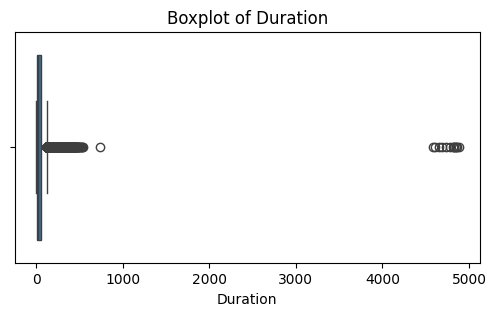

In [34]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Duration'])
plt.title('Boxplot of Duration')
plt.xlabel('Duration')
plt.show()

Terdapat extreme outlier > 1000, mari dilihat outllier ini akan memengarhui target atau tidak dengan visualisasi data dan juga tabel

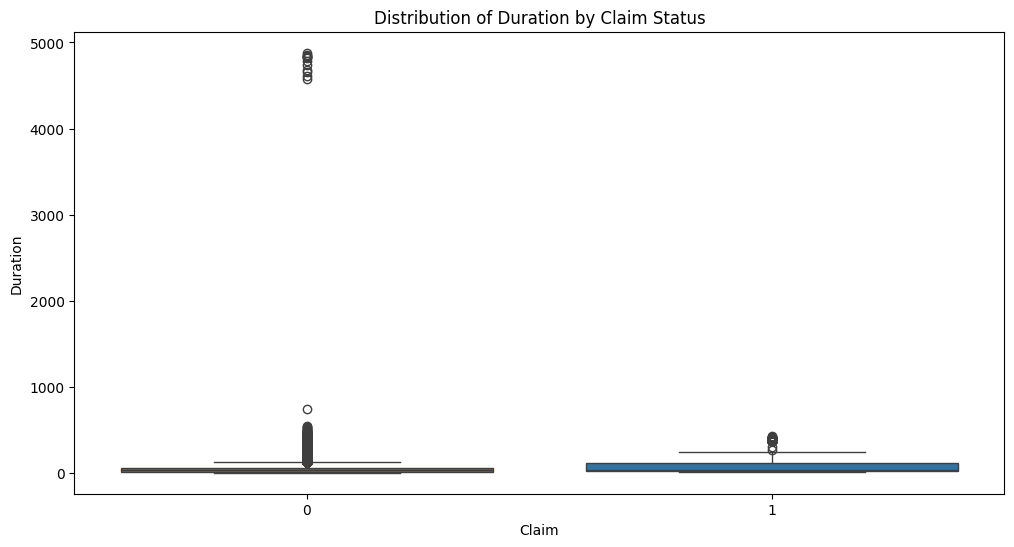

In [35]:
# Visualisasi distribusi 'Duration' berdasarkan 'Claim'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Claim', y='Duration', data=data)
plt.title('Distribution of Duration by Claim Status')
plt.show()

In [36]:
# Check extreme outlier apakah mempengaruhi target atau tidak
data[(data['Duration']>1000) & (data['Claim']==1)]

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim


Berdasarkan output keduanya menunjukkan bahwa: 
- Tidak Relevan untuk Target: Extreme outliers dalam Duration mungkin tidak memberikan informasi tambahan atau relevansi terhadap target Claim. Dengan kata lain, nilai ekstrem pada Duration tidak berhubungan langsung dengan kemungkinan klaim.
- Data Valid: Nilai-nilai tersebut mungkin valid tetapi tidak mempengaruhi hasil klaim, sehingga mungkin tidak perlu penanganan khusus.

Maka, extreme outliers ini dapat didrop saja.

In [37]:
data.drop(data[data['Duration'] > 1000].index, inplace=True)

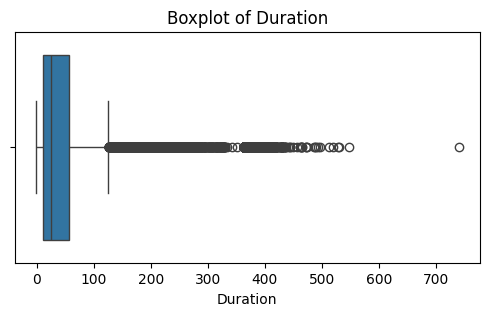

In [38]:
# check kembali outlier
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Duration'])
plt.title('Boxplot of Duration')
plt.xlabel('Duration')
plt.show()

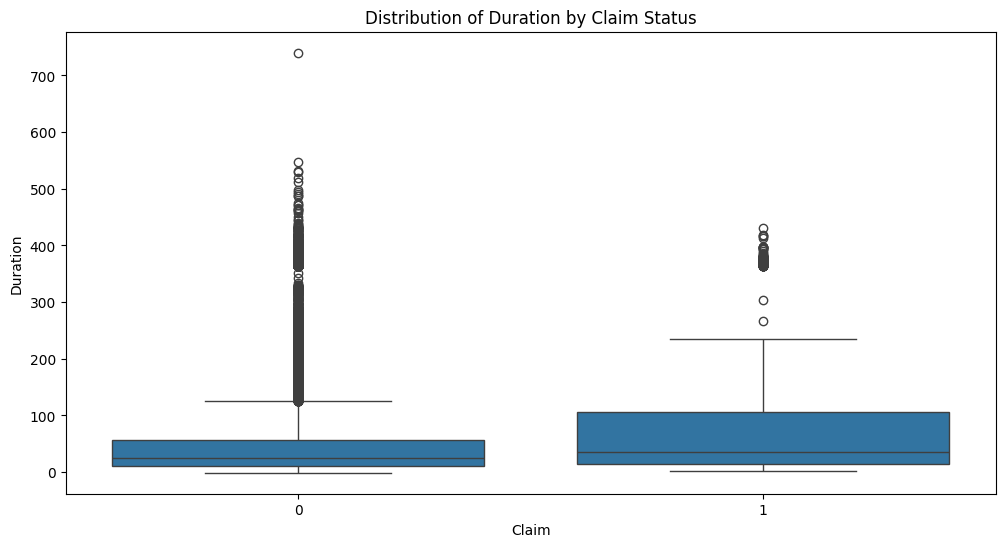

In [39]:
# Visualisasi distribusi 'Duration' berdasarkan 'Claim'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Claim', y='Duration', data=data)
plt.title('Distribution of Duration by Claim Status')
plt.show()

In [40]:
# Check outlier >100 dan kelas target = 1
data[(data['Duration']>100) & (data['Claim']==1)] 

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
13,C2B,Airlines,Online,Annual Silver Plan,F,376,SINGAPORE,252.85,63.21,43,1
50,LWC,Travel Agency,Online,Annual Travel Protect Gold,M,370,CHINA,204.60,132.99,39,1
102,EPX,Travel Agency,Online,2 way Comprehensive Plan,M,156,JAPAN,26.00,0.00,36,1
695,C2B,Airlines,Online,Annual Gold Plan,M,370,SINGAPORE,333.00,83.25,30,1
1087,C2B,Airlines,Online,Annual Silver Plan,F,364,SINGAPORE,216.00,54.00,42,1
...,...,...,...,...,...,...,...,...,...,...,...
42850,C2B,Airlines,Online,Bronze Plan,M,116,SINGAPORE,53.50,13.38,36,1
43412,C2B,Airlines,Online,Annual Gold Plan,M,373,SINGAPORE,333.00,83.25,45,1
43554,C2B,Airlines,Online,Annual Silver Plan,M,364,SINGAPORE,252.85,63.21,30,1
43560,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,252.85,63.21,47,1


In [41]:
def calculate_outlier_percentage(df, Commision):
    # Menghitung batas bawah dan atas untuk outlier menggunakan IQR
    Q1 = df[Commision].quantile(0.25)
    Q3 = df[Commision].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menentukan data yang dianggap sebagai outlier
    outliers = df[(df[Commision] < lower_bound) | (df[Commision] > upper_bound)]

    # Menghitung persentase outlier
    outlier_percentage = (len(outliers) / len(df)) * 100

    return outlier_percentage

# Menggunakan fungsi untuk kolom 'Net Sales'
outlier_percentage_net_sales = calculate_outlier_percentage(data, 'Duration')
print(f'Persentase Outlier untuk kolom Duration: {outlier_percentage_net_sales:.2f}%')

Persentase Outlier untuk kolom Duration: 8.79%


Walaupun presentase Outlier `Duration` ini cukup tinggi, outlier ini tidak didrop dan akan diatasi dengan trasnformasi data saja. 

2. **Column : `Net Sales`**

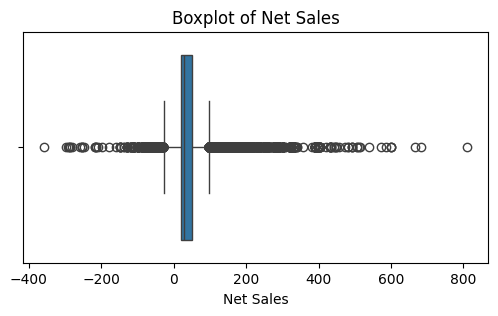

In [42]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Net Sales'])
plt.title('Boxplot of Net Sales')
plt.xlabel('Net Sales')
plt.show()

In [43]:
# Hapus data outlier Net Sales < 0
data.drop(data[data['Net Sales'] < 0].index, inplace=True)

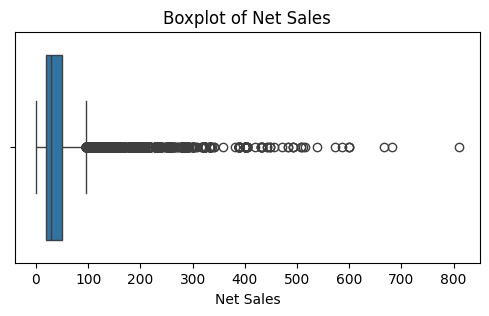

In [44]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Net Sales'])
plt.title('Boxplot of Net Sales')
plt.xlabel('Net Sales')
plt.show()

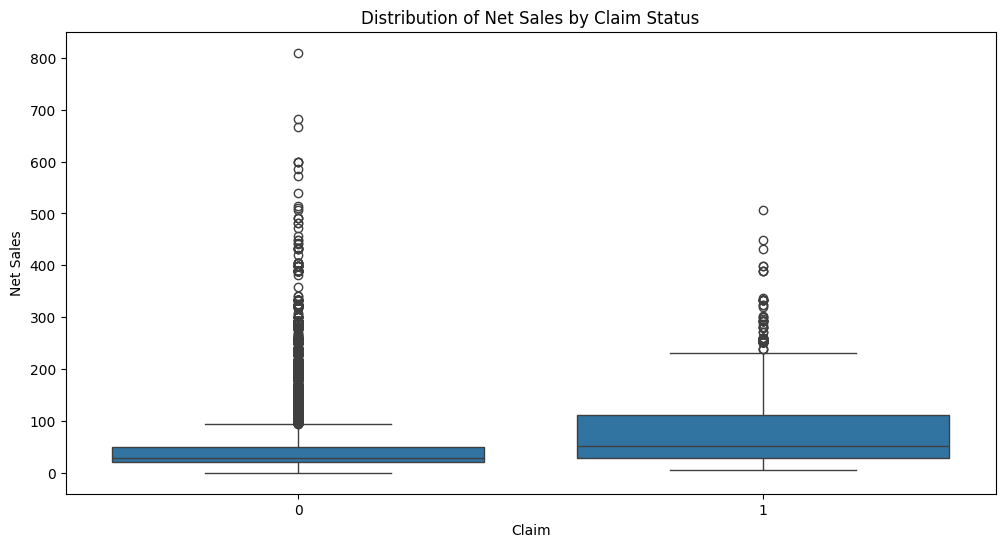

In [45]:
# Visualisasi distribusi 'Net Sales' berdasarkan 'Claim'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Claim', y='Net Sales', data=data)
plt.title('Distribution of Net Sales by Claim Status')
plt.show()

In [46]:
def calculate_outlier_percentage(df, NetSales):
    # Menghitung batas bawah dan atas untuk outlier menggunakan IQR
    Q1 = df[NetSales].quantile(0.25)
    Q3 = df[NetSales].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menentukan data yang dianggap sebagai outlier
    outliers = df[(df[NetSales] < lower_bound) | (df[NetSales] > upper_bound)]

    # Menghitung persentase outlier
    outlier_percentage = (len(outliers) / len(df)) * 100

    return outlier_percentage

# Menggunakan fungsi untuk kolom 'Net Sales'
outlier_percentage_net_sales = calculate_outlier_percentage(data, 'Net Sales')
print(f'Persentase Outlier positif untuk kolom Net Sales: {outlier_percentage_net_sales:.2f}%')

Persentase Outlier positif untuk kolom Net Sales: 8.36%


Walaupun presentase Outlier positif `Net Sales` ini cukup tinggi, outlier ini tidak didrop dan akan diatasi dengan trasnformasi data saja.

3. **Column : `Commision (in value)`**

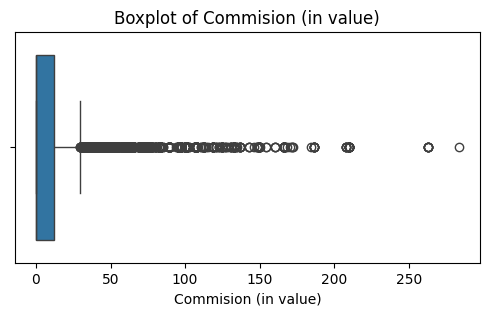

In [47]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Commision (in value)'])
plt.title('Boxplot of Commision (in value)')
plt.xlabel('Commision (in value)')
plt.show()

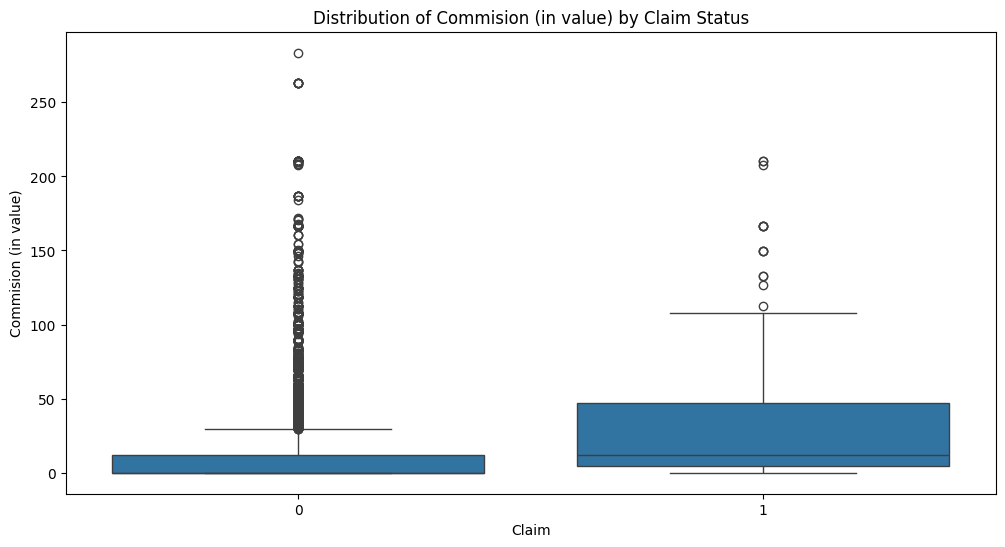

In [48]:
# Visualisasi distribusi 'Commision (in value)' berdasarkan 'Claim'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Claim', y='Commision (in value)', data=data)
plt.title('Distribution of Commision (in value) by Claim Status')
plt.show()

In [49]:
def calculate_outlier_percentage(df, Commision):
    # Menghitung batas bawah dan atas untuk outlier menggunakan IQR
    Q1 = df[Commision].quantile(0.25)
    Q3 = df[Commision].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menentukan data yang dianggap sebagai outlier
    outliers = df[(df[Commision] < lower_bound) | (df[Commision] > upper_bound)]

    # Menghitung persentase outlier
    outlier_percentage = (len(outliers) / len(df)) * 100

    return outlier_percentage

# Menggunakan fungsi untuk kolom 'Net Sales'
outlier_percentage_net_sales = calculate_outlier_percentage(data, 'Commision (in value)')
print(f'Persentase Outlier untuk kolom Commision (in value): {outlier_percentage_net_sales:.2f}%')

Persentase Outlier untuk kolom Commision (in value): 10.06%


Walaupun presentase Outlier `Commision (in value)` ini cukup tinggi, outlier ini tidak didrop dan akan diatasi dengan trasnformasi data saja.

In [50]:
data.shape

(39152, 11)

In [51]:
data.duplicated().sum()

0

Setelah mengatasi outlier: 
- dimensi data menjadi 39152 baris dan 11 kolom.
- Tidak terdapat duplikat data.

**Delete Column Unused and Non-Relevant**

**Column: `Age`**

In [52]:
# Menghitung korelasi Spearman
spearman_corr = data[['Age', 'Claim']].corr(method='spearman')
spearman_corr

,Age,Claim
Age,1.000000,-0.027482
Claim,-0.027482,1.000000


Jika dilihat dari hasil korelasi di atas dan heatmap (di data understanding) yang menunjukkan bahwa hubungan antara usia dan status klaim sangat lemah, bahkan hampir tidak ada korelasi yang signifikan, maka kolom `Age` akan didrop.

In [53]:
# Drop Column Age
data = data.drop(columns=['Age'])

**Column: Distribution Channel**

Jika dilihat hasil dari Chi-Square, kolom Distribution Channel ini menunjukkan bahwa tidak memengaruhi target karena p-valuenya sangat tinggi dari 0.05, maka kolom Distribution Channel akan didrop.

In [54]:
# Drop Column Distribution Channel
data = data.drop(columns=['Distribution Channel'])

In [55]:
data.head(3)

,Agency,Agency Type,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Claim
0,C2B,Airlines,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,0
1,EPX,Travel Agency,Cancellation Plan,M,4,MALAYSIA,10.0,0.0,0
2,JZI,Airlines,Basic Plan,M,19,INDIA,22.0,7.7,0


In [56]:
data.shape

(39152, 9)

Setelah drop kolom yang tidak relevan, memiliki korelasi rendah dan tidak signifikan dengan target, jumlah dimensi menjadi 39152 baris dan 9 kolom. 

**Duplicate Data**

In [57]:
# Extract General Information (Tipe Data, Missing Value, %Missing Value, Unique, Sample Unique)

listItem = [] # data yang akan ditampung 
for i in data.columns:
    listItem.append([
        i, 
        data[i].dtype,                                  #tipe data
        data[i].isna().sum(),                           # missing value
        round(data[i].isna().sum()/len(data)*100,2),    # %Missing Value
        data[i].nunique(),                              # unique
        data[i].unique()[:3]                            # sample unique
    ])

infoDF2 = pd.DataFrame(listItem, columns= 'Nama Kolom, Tipe Data, Missing Value, %Missing Value, Unique, Sample Unique'.split(', '))
infoDF2

,Nama Kolom,Tipe Data,Missing Value,%Missing Value,Unique,Sample Unique
0,Agency,object,0,0.0,16,"[C2B, EPX, JZI]"
1,Agency Type,object,0,0.0,2,"[Airlines, Travel Agency]"
2,Product Name,object,0,0.0,26,"[Annual Silver Plan, Cancellation Plan, Basic ..."
3,Gender,object,0,0.0,2,"[F, M]"
4,Duration,int64,0,0.0,423,"[365, 4, 19]"
5,Destination,object,0,0.0,137,"[SINGAPORE, MALAYSIA, INDIA]"
6,Net Sales,float64,0,0.0,884,"[216.0, 10.0, 22.0]"
7,Commision (in value),float64,0,0.0,912,"[54.0, 0.0, 7.7]"
8,Claim,int64,0,0.0,2,"[0, 1]"


In [58]:
data.duplicated().sum()

8769

Terdapat duplikat data baru muncul setelah menghapus kolom yang tidak signifikan dengan target. Hal ini dapat diatasi dengan drop kembali data yang duplikat.

In [59]:
# Memeriksa duplikat data
duplicates_after_outliers = data[data.duplicated()]
print("Duplikat data setelah menangani outliers: ")
print(duplicates_after_outliers)

# Menghapus duplikat data
data = data.drop_duplicates()

# Memeriksa jumlah data setelah menghapus duplikat
print(f"Jumlah data setelah menghapus duplikat: {len(data)}")

Duplikat data setelah menangani outliers: 
      Agency    Agency Type              Product Name Gender  Duration  \
92       EPX  Travel Agency         Cancellation Plan      M         6   
172      EPX  Travel Agency         Cancellation Plan      M         4   
330      C2B       Airlines        Annual Silver Plan      F       365   
385      EPX  Travel Agency  2 way Comprehensive Plan      M         3   
394      RAB       Airlines                Value Plan      F         4   
...      ...            ...                       ...    ...       ...   
44318    EPX  Travel Agency  2 way Comprehensive Plan      M        65   
44319    TST  Travel Agency     Travel Cruise Protect      F        94   
44320    EPX  Travel Agency  2 way Comprehensive Plan      M         7   
44322    EPX  Travel Agency  2 way Comprehensive Plan      M         6   
44325    TST  Travel Agency     Travel Cruise Protect      M        64   

             Destination  Net Sales  Commision (in value)  Claim  
9

In [60]:
data.shape

(30383, 9)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30383 entries, 0 to 44327
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                30383 non-null  object 
 1   Agency Type           30383 non-null  object 
 2   Product Name          30383 non-null  object 
 3   Gender                30383 non-null  object 
 4   Duration              30383 non-null  int64  
 5   Destination           30383 non-null  object 
 6   Net Sales             30383 non-null  float64
 7   Commision (in value)  30383 non-null  float64
 8   Claim                 30383 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.3+ MB


Setelah mengatasi duplikat data lagi, didapatkan informasi bahwa:
- Jumlah dimensi data sebesar (30383 baris, 9 kolom)
- Missing values sudah tidak ada (teratasi dengan baik)

In [62]:
data

,Agency,Agency Type,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Claim
0,C2B,Airlines,Annual Silver Plan,F,365,SINGAPORE,216.0,54.00,0
1,EPX,Travel Agency,Cancellation Plan,M,4,MALAYSIA,10.0,0.00,0
2,JZI,Airlines,Basic Plan,M,19,INDIA,22.0,7.70,0
3,EPX,Travel Agency,2 way Comprehensive Plan,M,20,UNITED STATES,112.0,0.00,0
4,C2B,Airlines,Bronze Plan,M,8,SINGAPORE,16.0,4.00,0
...,...,...,...,...,...,...,...,...,...
44317,JZI,Airlines,Value Plan,M,11,UNITED KINGDOM,87.0,30.45,0
44323,EPX,Travel Agency,2 way Comprehensive Plan,M,14,CHINA,30.0,0.00,1
44324,CWT,Travel Agency,Rental Vehicle Excess Insurance,M,17,AUSTRALIA,79.2,47.52,0
44326,EPX,Travel Agency,2 way Comprehensive Plan,M,51,CHINA,36.0,0.00,0


In [63]:
# Menyimpan data yang telah dibersihkan
data.to_csv('dataCleaned.csv', index=False)

In [64]:
# Read Data terbaru
dataa = pd.read_csv("dataCleaned.csv")
dataa.head()

,Agency,Agency Type,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Claim
0,C2B,Airlines,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,0
1,EPX,Travel Agency,Cancellation Plan,M,4,MALAYSIA,10.0,0.0,0
2,JZI,Airlines,Basic Plan,M,19,INDIA,22.0,7.7,0
3,EPX,Travel Agency,2 way Comprehensive Plan,M,20,UNITED STATES,112.0,0.0,0
4,C2B,Airlines,Bronze Plan,M,8,SINGAPORE,16.0,4.0,0


**Cek Proporsi Data**

In [65]:
# Imbalanced data proportion
(pd.crosstab(index=dataa['Claim'],columns='Proportion (%)',normalize=True)*100).round(2)

col_0,Proportion (%)
Claim,
0,97.94
1,2.06


Jika dilihat dari proporsi antara class 0 dan 1, class 0 lebih besar daripada class satu, terjadinya ketidakseimbangan data. Untuk mengatasinya akan mencoba resampling dengan resample pada tahap feature engineering.

### **Feature Engineering**
**Encoding**

Mengonversikan data yang dtypes nya object 

In [66]:
# Extract General Information (Tipe Data, Missing Value, %Missing Value, Unique, Sample Unique)

listItem = [] # data yang akan ditampung 
for i in dataa.columns:
    listItem.append([
        i, 
        dataa[i].dtype,                                  #tipe data
        dataa[i].isna().sum(),                           # missing value
        round(dataa[i].isna().sum()/len(dataa)*100,2),    # %Missing Value
        dataa[i].nunique(),                              # unique
        dataa[i].unique()[:3]                            # sample unique
    ])

infoDF3 = pd.DataFrame(listItem, columns= 'Nama Kolom, Tipe Data, Missing Value, %Missing Value, Unique, Sample Unique'.split(', '))
infoDF3

,Nama Kolom,Tipe Data,Missing Value,%Missing Value,Unique,Sample Unique
0,Agency,object,0,0.0,16,"[C2B, EPX, JZI]"
1,Agency Type,object,0,0.0,2,"[Airlines, Travel Agency]"
2,Product Name,object,0,0.0,26,"[Annual Silver Plan, Cancellation Plan, Basic ..."
3,Gender,object,0,0.0,2,"[F, M]"
4,Duration,int64,0,0.0,423,"[365, 4, 19]"
5,Destination,object,0,0.0,137,"[SINGAPORE, MALAYSIA, INDIA]"
6,Net Sales,float64,0,0.0,884,"[216.0, 10.0, 22.0]"
7,Commision (in value),float64,0,0.0,912,"[54.0, 0.0, 7.7]"
8,Claim,int64,0,0.0,2,"[0, 1]"


In [67]:
dataa['Agency'].unique()

array(['C2B', 'EPX', 'JZI', 'CWT', 'LWC', 'ART', 'CSR', 'RAB', 'KML',
       'SSI', 'TST', 'TTW', 'JWT', 'ADM', 'CCR', 'CBH'], dtype=object)

In [68]:
columns_to_check = ['Agency', 'Agency Type','Product Name', 'Gender', 'Destination']

for column in columns_to_check:
    unique_values = dataa[column].unique()
    print(f"Unique values in '{column}' column:")
    print(unique_values)
    print()

Unique values in 'Agency' column:
['C2B' 'EPX' 'JZI' 'CWT' 'LWC' 'ART' 'CSR' 'RAB' 'KML' 'SSI' 'TST' 'TTW'
 'JWT' 'ADM' 'CCR' 'CBH']

Unique values in 'Agency Type' column:
['Airlines' 'Travel Agency']

Unique values in 'Product Name' column:
['Annual Silver Plan' 'Cancellation Plan' 'Basic Plan'
 '2 way Comprehensive Plan' 'Bronze Plan' '1 way Comprehensive Plan'
 'Rental Vehicle Excess Insurance' 'Single Trip Travel Protect Gold'
 'Silver Plan' 'Value Plan' '24 Protect' 'Annual Travel Protect Gold'
 'Comprehensive Plan' 'Ticket Protector' 'Travel Cruise Protect'
 'Single Trip Travel Protect Silver' 'Individual Comprehensive Plan'
 'Gold Plan' 'Annual Gold Plan' 'Child Comprehensive Plan'
 'Annual Travel Protect Silver' 'Single Trip Travel Protect Platinum'
 'Premier Plan' 'Annual Travel Protect Platinum'
 'Spouse or Parents Comprehensive Plan' 'Travel Cruise Protect Family']

Unique values in 'Gender' column:
['F' 'M']

Unique values in 'Destination' column:
['SINGAPORE' 'MALAYSIA' '

Berdasarkan unique value setiap kolom, encoding yang tepat yaitu:
- Agency : Binary, karena >5 unique values
- Agency Type : One Hot Encoder, karena <5 unique values
- Product Name: Binary, karena >5 unique values
- Gender : One Hot Encoder, karena <5 unique values
- Destination: Frequency Encoding, karena destination ini memilki hubungan dengan target

In [69]:
# Define features and target
categorical_features_binary = ['Agency', 'Product Name']
categorical_features_onehot = ['Agency Type', 'Gender']
categorical_features_frequency = ['Destination']
numerical_features = ['Duration', 'Net Sales', 'Commision (in value)']
target = 'Claim'

# Define feature and target
x = dataa[categorical_features_binary + categorical_features_onehot + categorical_features_frequency + numerical_features]
y = dataa[target]

In [70]:
# Split Data with Stratification
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=50, 
                                                stratify=y)

**Resampling pada Data Pelatihan**

konversikan lagi class 0 dan 1 menjadi class minoritas dan mayoritas

In [71]:
## Pisahkan kelas mayoritas dan minoritas di data pelatihan
X_train_majority = xtrain[ytrain == 0]
y_train_majority = ytrain[ytrain == 0]

X_train_minority = xtrain[ytrain == 1]
y_train_minority = ytrain[ytrain == 1]

menggunkan oversampling

In [72]:
# Oversampling kelas minoritas
X_train_minority_upsampled = resample(X_train_minority,
                                      replace=True,
                                      n_samples=len(X_train_majority),
                                      random_state=50)
y_train_minority_upsampled = resample(y_train_minority,
                                      replace=True,
                                      n_samples=len(y_train_majority),
                                      random_state=50)

In [73]:
# Combine all data
X_train_resampled = pd.concat([X_train_majority, X_train_minority_upsampled])
y_train_resampled = pd.concat([y_train_majority, y_train_minority_upsampled])

In [74]:
# Hitung proporsi kelas setelah resampling
print("Proporsi kelas setelah resampling:")
print(y_train_resampled.value_counts(normalize=True))

Proporsi kelas setelah resampling:
Claim
0    0.5
1    0.5
Name: proportion, dtype: float64


Setelah dilakukan resampling dengan resample oversampling, didapatkan proprosinya sudah sama rata. 

**Lanjut Feature Engineering**

In [75]:
# Frequency Encoding function
def frequency_encoding(df, column):
    freq_map = df[column].value_counts().to_dict()
    return df[column].map(freq_map)

# Apply Frequency Encoding
def apply_frequency_encoding(X):
    for col in categorical_features_frequency:
        X[col] = frequency_encoding(X, col)
    return X

In [76]:
# Preprocessing for categorical Data
# Binary Encoder
binary_transformer = Pipeline(steps=[
    ('binary_encoder', BinaryEncoder())
])

# One-Hot Encoder
onehot_transformer = Pipeline(steps=[
    ('onehot_encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Frequency Encoding (handled separately with FunctionTransformer)
frequency_transformer = Pipeline(steps=[
    ('frequency_encoder', FunctionTransformer(func=apply_frequency_encoding, validate=False))
])

# Combine all categorical transformers
categorical_transformer = ColumnTransformer(
    transformers=[
        ('binary', binary_transformer, categorical_features_binary),
        ('onehot', onehot_transformer, categorical_features_onehot),
        ('frequency', frequency_transformer, categorical_features_frequency)
    ], remainder='passthrough'
)


**Transformasi**

In [77]:
dataa.describe()

,Duration,Net Sales,Commision (in value),Claim
count,30383.000000,30383.000000,30383.000000,30383.000000
mean,53.367245,44.776639,9.989413,0.020571
std,70.239629,46.925632,20.812830,0.141944
min,-1.000000,0.000000,0.000000,0.000000
25%,13.000000,20.000000,0.000000,0.000000
50%,30.000000,30.000000,0.000000,0.000000
75%,64.000000,56.000000,11.880000,0.000000
max,740.000000,810.000000,283.500000,1.000000


Berdasarkan hasil statistic deskriptif didapatkan: 
Duration:
-  Rentang nilai (min dan max : -1 hingga 740.0) menunjukkan adanya outliers yang signifikan
- Median (30) < Mean (53.37), menunjukkan data skewed ke kanan
- Cocok menggunakan Log Transformation untuk menormalkan distribusi dan mengurangi efek dari extreme outliers
Net Sales:
- Rentang nilai (min dan max : 0 hingga 810.0) menunjukkan adanya outliers
- Median (30) < Mean (44.78), menunjukkan data skewed ke kanan
- Cocok menggunakan Log Transformation untuk menormalkan distribusi dan meredam efek outliers
Commision (in value)
- Sebagian besar nilai Commision (in value) adalah 0 (karena 25% dan 50% percentiles = 0), namun terdapat outliers yang signifikan hingga 283.5.
- Distribusi ini sangat skewed dengan sebagian besar nilai di sekitar 0 dan beberapa outliers besar.
- cocok menggunakan robust scaler untuk mengatasi outlier 

In [78]:
# Use Robust Scaler for numerical features
numerical_transformer = Pipeline(steps=[
    ('robust_scaler', RobustScaler())
])

In [79]:
# Combine all preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features_binary + categorical_features_onehot + categorical_features_frequency),
        ('num', numerical_transformer, numerical_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [80]:
# Fit and transform on training data
X_train_transformed = pipeline.fit_transform(X_train_resampled)

# Transform the test data
X_test_transformed = pipeline.transform(xtest)

## **MODELLING & EVALUATION**
### **Model Selection**
**Define Model**

In [81]:
# Definisikan Stratified K-Fold
strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=50)

In [83]:
# Define Model
models ={
    ## Base Model
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),

    ## Ensamble Model
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5),
    "XGBoost": XGBClassifier(n_estimators=100),
    "AdaBoost": AdaBoostClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100),

}

In [84]:
scoring = {
    'F1 Score': make_scorer(f1_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'Accuracy': make_scorer(accuracy_score)
}

**Cross Validation**

In [85]:
model_result = {}

for name, model in models.items():
    cv_results = cross_validate(model, X_train_transformed, y_train_resampled, cv=strat_kfold, scoring=scoring)
    model_result[name] = {
        'F1 Score': cv_results['test_F1 Score'].mean(),
        'Precision': cv_results['test_Precision'].mean(),
        'Recall': cv_results['test_Recall'].mean(),
        'Accuracy': cv_results['test_Accuracy'].mean()
    }

for model_name, metrics in model_result.items():
    print(f"Model: {model_name}")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")
    print("-" * 30)

Model: Logistic Regression
F1 Score: 0.7178
Precision: 0.7648
Recall: 0.6763
Accuracy: 0.7341
------------------------------
Model: K-Nearest Neighbors
F1 Score: 0.9678
Precision: 0.9375
Recall: 1.0000
Accuracy: 0.9667
------------------------------
Model: Decision Tree
F1 Score: 0.9850
Precision: 0.9705
Recall: 1.0000
Accuracy: 0.9848
------------------------------
Model: Naive Bayes
F1 Score: 0.6943
Precision: 0.7740
Recall: 0.6295
Accuracy: 0.7228
------------------------------
Model: Random Forest
F1 Score: 0.7568
Precision: 0.8121
Recall: 0.7086
Accuracy: 0.7723
------------------------------
Model: XGBoost
F1 Score: 0.9600
Precision: 0.9230
Recall: 1.0000
Accuracy: 0.9583
------------------------------
Model: AdaBoost
F1 Score: 0.7560
Precision: 0.7780
Recall: 0.7352
Accuracy: 0.7627
------------------------------
Model: Gradient Boosting
F1 Score: 0.7980
Precision: 0.8101
Recall: 0.7863
Accuracy: 0.8010
------------------------------


In [86]:
# Initialize a list to hold results
results_list = []

# Loop through the model results to collect data for the DataFrame
for model_name, metrics in model_result.items():
    results_list.append({
        'Model': model_name,
        'F1 Score': metrics['F1 Score'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'Accuracy': metrics['Accuracy']
    })

# Convert the list to a DataFrame
results_df = pd.DataFrame(results_list).sort_values(by='F1 Score', ascending=False)
results_df

,Model,F1 Score,Precision,Recall,Accuracy
2,Decision Tree,0.985022,0.970489,1.000000,0.984794
1,K-Nearest Neighbors,0.967764,0.937545,1.000000,0.966689
5,XGBoost,0.959961,0.923010,1.000000,0.958288
7,Gradient Boosting,0.798014,0.810126,0.786272,0.800995
4,Random Forest,0.756837,0.812142,0.708645,0.772326
6,AdaBoost,0.755981,0.778011,0.735235,0.762707
0,Logistic Regression,0.717774,0.764804,0.676343,0.734143
3,Naive Bayes,0.694264,0.773996,0.629463,0.722801


Model dengan nilai F1 Score tertinggi adalah Decision Tree. Untuk langkah selanjutnya akan memilih 3 model terbaik berdasarkan nilai f1 scorenya. 

**Deep Cross Validation**

untuk memastikan bahwa model terbaik benar-benar stabil dan konsisten.

In [93]:
# Pilih 3 model dengan F1 Score tertinggi
top_models_names = results_df.head(3)['Model'].values
top_models_names

array(['Decision Tree', 'K-Nearest Neighbors', 'XGBoost'], dtype=object)

Melakukan deep cross validation pada 3 best model yang dipilih:
- Decision Tree
- K-Nearest Neighbors 
- XGBoost

In [94]:
# Simpan model yang sesuai dalam sebuah dictionary
top_models = {name: models[name] for name in top_models_names}

In [95]:
# Meningkatkan jumlah fold untuk deep cross-validation
deep_strat_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [97]:
# Lakukan deep cross-validation pada 3 model teratas
deep_cv_results = {}
for model_name in top_models:
    model = top_models[model_name]
    scores = cross_val_score(model, X_train_transformed, y_train_resampled, cv=deep_strat_kfold, scoring='f1')
    deep_cv_results[model_name] = {
        'Mean F1 Score': scores.mean(),
        'Standard Deviation': scores.std()
    }

In [98]:
# Tampilkan hasil deep cross-validation
for model_name, metrics in deep_cv_results.items():
    print(f"Model: {model_name}")
    print(f"Mean F1 Score: {metrics['Mean F1 Score']:.4f}")
    print(f"Standard Deviation: {metrics['Standard Deviation']:.4f}")
    print("-" * 30)

Model: Decision Tree
Mean F1 Score: 0.9860
Standard Deviation: 0.0010
------------------------------
Model: K-Nearest Neighbors
Mean F1 Score: 0.9706
Standard Deviation: 0.0016
------------------------------
Model: XGBoost
Mean F1 Score: 0.9601
Standard Deviation: 0.0025
------------------------------


In [99]:
# Initialize a list to hold results
deep_cv_list = []

for model_name, metrics in deep_cv_results.items():
    deep_cv_list.append({
        'Model': model_name,
        'Mean F1 Score': metrics['Mean F1 Score'],
        'Standard Deviation': metrics['Standard Deviation']
    })

# Convert the list to a DataFrame
deep_cv_df = pd.DataFrame(deep_cv_list)
deep_cv_df

,Model,Mean F1 Score,Standard Deviation
0,Decision Tree,0.985981,0.001048
1,K-Nearest Neighbors,0.970567,0.001571
2,XGBoost,0.960125,0.002510


Berdasarkan hasil deep cross validate didapatkan informasi:

- Naive Bayes: konsistensi tinggi, performa rendah
- Stacking ensamble 3: Performa sedikit lebih baik, variasi lebih tinggi
- Stacking ensamble 2: Performa terendah, variasi signifikan

Oleh karena itu model yang akan digunakan yaitu model Decision Tree

**Evaluasi Model**

Melakukan evaluasi mendalam menggunakan classification report, dan confussion matrics pada data testing untuk memastikan performa model yang sebenarnya.

In [105]:
# Train model on the full training data
best_model = DecisionTreeClassifier()  # Use the best hyperparameters if tuned
best_model.fit(X_train_transformed, y_train_resampled)

# Predict on test data
y_pred = best_model.predict(X_test_transformed)

In [106]:
# Langkah 3: Generate Classification Report
class_report = classification_report(ytest, y_pred, output_dict=True)
report_df = pd.DataFrame(class_report).transpose()
print("Classification Report:")
report_df

Classification Report:


,precision,recall,f1-score,support
0,0.979612,0.992944,0.986233,5952.000000
1,0.045455,0.016000,0.023669,125.000000
accuracy,0.972848,0.972848,0.972848,0.972848
macro avg,0.512533,0.504472,0.504951,6077.000000
weighted avg,0.960397,0.972848,0.966433,6077.000000


In [107]:
print("Classification Report:")
print(classification_report(ytest, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(ytest, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5952
           1       0.05      0.02      0.02       125

    accuracy                           0.97      6077
   macro avg       0.51      0.50      0.50      6077
weighted avg       0.96      0.97      0.97      6077

Confusion Matrix:
[[5910   42]
 [ 123    2]]


In [108]:
# Check class distribution after resampling
print("Class distribution after resampling:")
print(y_train_resampled.value_counts(normalize=True))

Class distribution after resampling:
Claim
0    0.5
1    0.5
Name: proportion, dtype: float64


In [111]:
# Periksa Overfitting - Evaluasi Data Pelatihan
# Prediksi pada data pelatihan
ytrain_pred = best_model.predict(X_train_transformed)

# Evaluasi model pada data pelatihan
print("Evaluasi pada Data Pelatihan")
print(classification_report(y_train_resampled, ytrain_pred))
print(confusion_matrix(y_train_resampled, ytrain_pred))

Evaluasi pada Data Pelatihan
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     23806
           1       0.99      1.00      1.00     23806

    accuracy                           1.00     47612
   macro avg       1.00      1.00      1.00     47612
weighted avg       1.00      1.00      1.00     47612

[[23636   170]
 [    0 23806]]


In [113]:
# Prediksi pada data uji
y_test_pred = best_model.predict(X_test_transformed)

# Evaluasi model pada data uji
print("Evaluasi pada Data Uji")
print(classification_report(ytest, y_test_pred))
print(confusion_matrix(ytest, y_test_pred))

Evaluasi pada Data Uji
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5952
           1       0.05      0.02      0.02       125

    accuracy                           0.97      6077
   macro avg       0.51      0.50      0.50      6077
weighted avg       0.96      0.97      0.97      6077

[[5910   42]
 [ 123    2]]


Dilihat dari evaluasi pada data pelatihan dan data uji diketahui terjadi overfitting yang sangat signifikan.

In [114]:
# Regularisasi Model Decision Tree
# Membuat dan melatih model Decision Tree dengan regularisasi
model2 = DecisionTreeClassifier(
    random_state=50,
    max_depth=5,               # Batasi kedalaman pohon
    min_samples_split=10,      # Minimal jumlah sampel untuk membagi node
    min_samples_leaf=5         # Minimal jumlah sampel di setiap daun
)

model2.fit(X_train_transformed, y_train_resampled)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=50)

In [115]:
# Cross Validation utnk menilai model
# Melakukan cross-validation
cv_scores = cross_val_score(model2, X_train_transformed, y_train_resampled, cv=10, scoring='f1')

# Menampilkan hasil
print(f'Mean F1 Score dari cross-validation: {np.mean(cv_scores):.4f}')
print(f'Standard Deviation F1 Score dari cross-validation: {np.std(cv_scores):.4f}')

Mean F1 Score dari cross-validation: 0.7689
Standard Deviation F1 Score dari cross-validation: 0.0080


In [116]:
# Evaluasi Model pada Data Uji
# Prediksi pada data uji
y_pred = model2.predict(X_test_transformed)

# Menampilkan laporan klasifikasi dan matriks kebingungannya
print("Classification Report:")
print(classification_report(ytest, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(ytest, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      5952
           1       0.06      0.30      0.11       125

    accuracy                           0.90      6077
   macro avg       0.52      0.61      0.53      6077
weighted avg       0.97      0.90      0.93      6077

Confusion Matrix:
[[5401  551]
 [  87   38]]


**Hyperparameter Tuning**

In [118]:
# Parameter grid untuk tuning
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

# Grid Search untuk Decision Tree
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=50), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_transformed, y_train_resampled)

# Menampilkan parameter terbaik
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best F1 Score: {grid_search.best_score_:.4f}')

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best F1 Score: 0.8599


In [119]:
best_model2 = grid_search.best_estimator_

# Prediksi pada data uji
y_pred_best = best_model2.predict(X_test_transformed)

# Menampilkan laporan klasifikasi dan matriks kebingungannya
print("Classification Report for Best Model:")
print(classification_report(ytest, y_pred_best))
print("Confusion Matrix for Best Model:")
print(confusion_matrix(ytest, y_pred_best))

Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      5952
           1       0.02      0.14      0.04       125

    accuracy                           0.86      6077
   macro avg       0.50      0.51      0.48      6077
weighted avg       0.96      0.86      0.91      6077

Confusion Matrix for Best Model:
[[5228  724]
 [ 107   18]]


**Metode sampling alternatif**

In [122]:
# Define models
modelsSampling = {
    "SMOTE": Pipeline([
        ('smote', SMOTE(random_state=50)),
        ('model', DecisionTreeClassifier(random_state=50))
    ]),
    "Undersampling": Pipeline([
        ('undersample', RandomUnderSampler(random_state=50)),
        ('model', DecisionTreeClassifier(random_state=50))
    ]),
    "SMOTE + Tomek Links": Pipeline([
        ('smote_enn', SMOTEENN(random_state=50)),
        ('model', DecisionTreeClassifier(random_state=50))
    ])
}

In [128]:
# Fit and evaluate models
results = []

for name, pipeline in modelsSampling.items():
    print(f"Evaluating {name}...")
    pipeline.fit(X_train_transformed, y_train_resampled)  # Fit model on training data
    y_pred = pipeline.predict(X_test_transformed)  # Predict on test data
    report = classification_report(ytest, y_pred, output_dict=True)
    
    # Collect metrics
    metrics = {
        'Model': name,
        'Precision 0': report['0']['precision'],
        'Recall 0': report['0']['recall'],
        'F1-Score 0': report['0']['f1-score'],
        'Precision 1': report['1']['precision'],
        'Recall 1': report['1']['recall'],
        'F1-Score 1': report['1']['f1-score'],
        'Accuracy': report['accuracy'],
    }
    results.append(metrics)

# Create DataFrame
results_df = pd.DataFrame(results)

# Display the results
print("Model Evaluation Results:")
results_df

Evaluating SMOTE...
Evaluating Undersampling...
Evaluating SMOTE + Tomek Links...
Model Evaluation Results:


,Model,Precision 0,Recall 0,F1-Score 0,Precision 1,Recall 1,F1-Score 1,Accuracy
0,SMOTE,0.980833,0.988743,0.984772,0.129870,0.080,0.099010,0.970051
1,Undersampling,0.980833,0.988743,0.984772,0.129870,0.080,0.099010,0.970051
2,SMOTE + Tomek Links,0.979734,0.990927,0.985299,0.052632,0.024,0.032967,0.971038


Informasi yang didapatkan yaitu semua ketika teknik samplling tersebut menunjukkan performa yang sangat baik dalam mendeteksi kelas mayoritas (class 0), tetapi kurang efektif dalam mendeteksi kelas minoritas (class 1).

**Coba Metrik Tambahan : ROC-AUC**

ROC AUC Score: 0.51


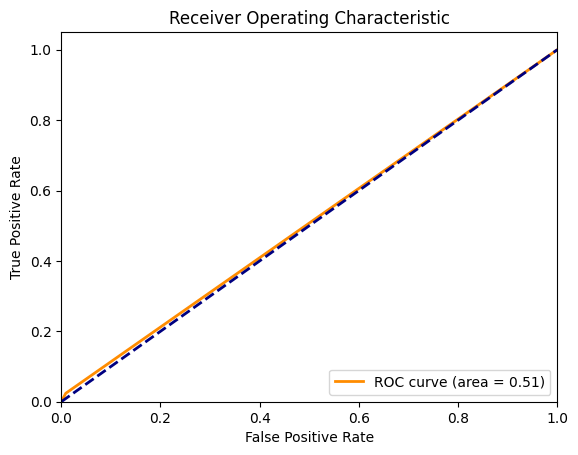

In [131]:
def evaluate_roc_auc(model, xtest, ytest):
    # Dapatkan probabilitas prediksi untuk kelas positif
    y_pred_proba = model.predict_proba(xtest)[:, 1]

    # Hitung ROC Curve dan AUC
    fpr, tpr, _ = roc_curve(ytest, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Print AUC Score
    print(f'ROC AUC Score: {roc_auc:.2f}')

    # Plot ROC Curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

# Gunakan fungsi ini setelah model di-fit
evaluate_roc_auc(pipeline, X_test_transformed, ytest)

Gambar di atas adalah kurva ROC (Receiver Operating Characteristic) dengan area di bawah kurva (AUC - Area Under Curve) sekitar 0,51. Kurva ROC digunakan untuk mengevaluasi kemampuan model dalam membedakan antara kelas positif dan negatif.

Nilai AUC sekitar 0,51 menunjukkan bahwa model Anda hampir tidak memiliki kemampuan untuk membedakan antara kelas positif dan negatif. Model ini hampir setara dengan model acak (random guessing). Dan juga, menunjukkan bahwa model tidak cukup baik untuk menangani klasifikasi ini dan mungkin perlu ditingkatkan.

Kurva ROC yang hampir mengikuti garis diagonal menunjukkan bahwa model memiliki tingkat false positive rate (FPR) yang hampir sama dengan true positive rate (TPR) pada berbagai threshold. Ini berarti model tidak bisa menentukan dengan baik mana yang benar-benar positif dan mana yang benar-benar negatif.


Save Model to Pickle extension

In [ ]:
import pickle

best_model = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100)),
        ('xgb', XGBClassifier(n_estimators=100)),
        ('nb', GaussianNB())
    ],
    final_estimator=GaussianNB()
)

# Save model to a file using pickle
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)